In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
songs= pd.read_csv("songs.csv")
songs_info= pd.read_csv("song_extra_info.csv")
users= pd.read_csv("members.csv")
test= pd.read_csv("test.csv")

In [62]:
test.head(2)

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library


In [63]:
print("songs:", songs.shape)
print("songs_info:", songs_info.shape)
print("users:", users.shape)
print("test:", test.shape)

songs: (2296320, 7)
songs_info: (1048575, 3)
users: (34403, 7)
test: (2556790, 6)


In [64]:
test = test.merge(songs, on='song_id', how='left')
test = test.merge(users, on='msno', how='left')
test = test.merge(songs_info, on='song_id', how='left')

In [65]:
test.duplicated().sum()

0

In [66]:
test.isnull().sum().sum()

4224298

In [67]:
test.dropna(inplace=True)

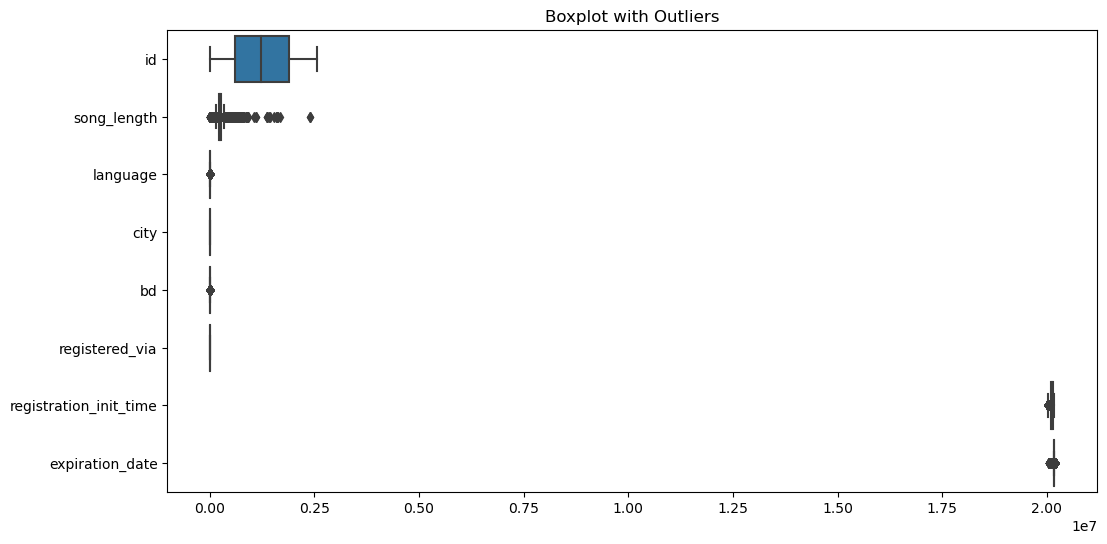

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(data=test, orient ='h')
plt.title('Boxplot with Outliers')
plt.show();

In [69]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for column in test.columns:
    if pd.api.types.is_numeric_dtype(test[column]):
        lower_range,upper_range = remove_outlier(test[column])
        test[column]= np.where(test[column]>upper_range, upper_range ,test[column])
        test[column]= np.where(test[column]<lower_range, lower_range ,test[column])

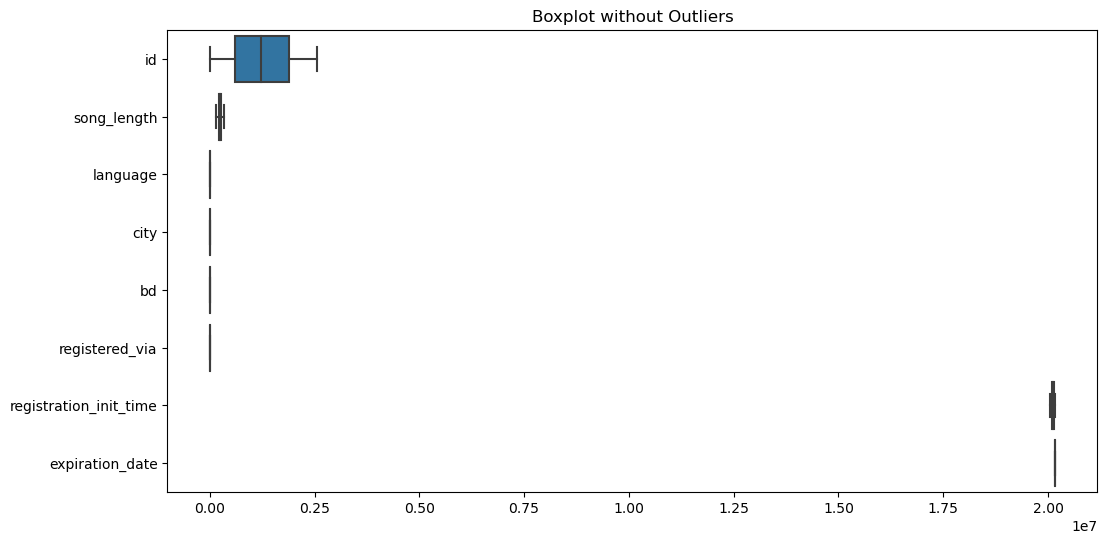

In [70]:
plt.figure(figsize=(12,6))
sns.boxplot(data=test, orient ='h')
plt.title('Boxplot without Outliers')
plt.show();

In [71]:
test.rename(columns={'msno': 'user_id', 'name': 'song_name', 'bd': 'age'}, inplace=True)

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556373 entries, 6 to 2556785
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      556373 non-null  float64
 1   user_id                 556373 non-null  object 
 2   song_id                 556373 non-null  object 
 3   source_system_tab       556373 non-null  object 
 4   source_screen_name      556373 non-null  object 
 5   source_type             556373 non-null  object 
 6   song_length             556373 non-null  float64
 7   genre_ids               556373 non-null  object 
 8   artist_name             556373 non-null  object 
 9   composer                556373 non-null  object 
 10  lyricist                556373 non-null  object 
 11  language                556373 non-null  float64
 12  city                    556373 non-null  float64
 13  age                     556373 non-null  float64
 14  gender                  

In [73]:
test['source_system_tab'] = test['source_system_tab'].astype('category')
test['source_screen_name'] = test['source_screen_name'].astype('category')
test['source_type'] = test['source_type'].astype('category')
test['registration_init_time'] = test['registration_init_time'].astype('int64')
test['expiration_date'] = test['expiration_date'].astype('int64')
test['language'] = test['language'].astype('str')

In [95]:
# Convert 'registration_init_time' and 'expiration_date' to datetime format
test['registration_init_time'] = pd.to_datetime(test['registration_init_time'], format='%Y%m%d', errors='coerce')
test['expiration_date'] = pd.to_datetime(test['expiration_date'], format='%Y%m%d', errors='coerce')

# Extract the year from 'registration_init_time' and rename the column
test['registration_year'] = test['registration_init_time']

test = test.drop(columns=['registration_init_time']) 

# Check the first few rows to confirm
print(test[['registration_year', 'expiration_date']].head())

   registration_year expiration_date
6         2007-07-25             NaT
7         2007-07-25             NaT
8         2007-07-25             NaT
11        2010-12-08      2017-10-09
12        2010-12-08      2017-10-09


In [96]:
test.head(2)

,song_id_new,user_id_new,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,expiration_date,song_name,isrc,registration_year
6,1,user_id1,6.0,radio,Radio,radio,200306.0,465,BoA,Joe Belmaati,BoA / Joe Belmaati,3.0,3.0,30.0,male,9.0,NaT,The Shadow,KRA301200363,2007-07-25
7,2,user_id1,7.0,my library,Local playlist more,local-playlist,344305.0,458,周傳雄 (Steve Chou),周傳雄,陳信榮,3.0,3.0,30.0,male,9.0,NaT,黃昏,TWA470053008,2007-07-25


In [75]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556373 entries, 6 to 2556785
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      556373 non-null  float64       
 1   user_id                 556373 non-null  object        
 2   song_id                 556373 non-null  object        
 3   source_system_tab       556373 non-null  category      
 4   source_screen_name      556373 non-null  category      
 5   source_type             556373 non-null  category      
 6   song_length             556373 non-null  float64       
 7   genre_ids               556373 non-null  object        
 8   artist_name             556373 non-null  object        
 9   composer                556373 non-null  object        
 10  lyricist                556373 non-null  object        
 11  language                556373 non-null  object        
 12  city                    556373 non

In [76]:
song_id_mapping = {song_id: idx + 1 for idx, song_id in enumerate(test['song_id'].unique())}
test['song_id_new'] = test['song_id'].map(song_id_mapping)
test = test.drop(columns=['song_id'])
test.head(2)

,id,user_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,song_id_new
6,6.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,radio,Radio,radio,200306.0,465,BoA,Joe Belmaati,BoA / Joe Belmaati,3.0,3.0,30.0,male,9.0,2007-07-25,NaT,The Shadow,KRA301200363,1
7,7.0,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,my library,Local playlist more,local-playlist,344305.0,458,周傳雄 (Steve Chou),周傳雄,陳信榮,3.0,3.0,30.0,male,9.0,2007-07-25,NaT,黃昏,TWA470053008,2


In [77]:
user_id_mapping = {user_id: f"user_id{idx + 1}" for idx, user_id in enumerate(test['user_id'].unique())}
test['user_id_new'] = test['user_id'].map(user_id_mapping)
test = test.drop(columns=['user_id'])
test.head(2)

,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc,song_id_new,user_id_new
6,6.0,radio,Radio,radio,200306.0,465,BoA,Joe Belmaati,BoA / Joe Belmaati,3.0,3.0,30.0,male,9.0,2007-07-25,NaT,The Shadow,KRA301200363,1,user_id1
7,7.0,my library,Local playlist more,local-playlist,344305.0,458,周傳雄 (Steve Chou),周傳雄,陳信榮,3.0,3.0,30.0,male,9.0,2007-07-25,NaT,黃昏,TWA470053008,2,user_id1


In [78]:
test.columns

Index(['id', 'source_system_tab', 'source_screen_name', 'source_type',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'language', 'city', 'age', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date', 'song_name', 'isrc',
       'song_id_new', 'user_id_new'],
      dtype='object')

In [79]:
test = test[['song_id_new', 'user_id_new'] + [col for col in test.columns if col not in ['song_id_new', 'user_id_new']]]

In [80]:
test.head(2)

,song_id_new,user_id_new,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,registration_init_time,expiration_date,song_name,isrc
6,1,user_id1,6.0,radio,Radio,radio,200306.0,465,BoA,Joe Belmaati,BoA / Joe Belmaati,3.0,3.0,30.0,male,9.0,2007-07-25,NaT,The Shadow,KRA301200363
7,2,user_id1,7.0,my library,Local playlist more,local-playlist,344305.0,458,周傳雄 (Steve Chou),周傳雄,陳信榮,3.0,3.0,30.0,male,9.0,2007-07-25,NaT,黃昏,TWA470053008


In [81]:
test.shape

(556373, 20)

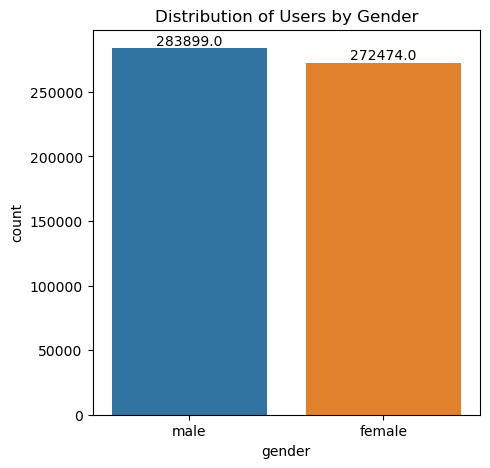

In [82]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='gender', data=test)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('Distribution of Users by Gender')
plt.show();

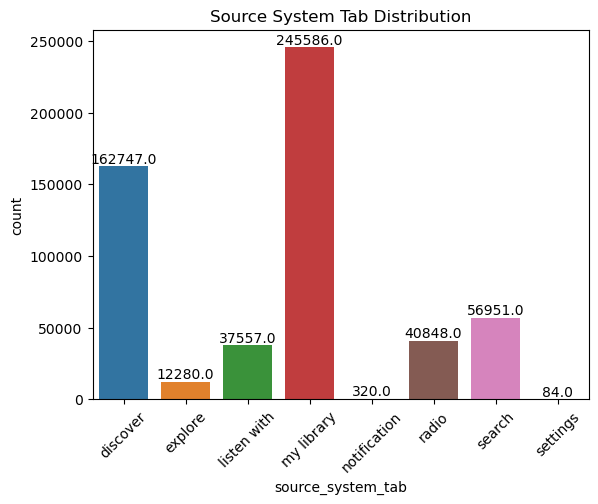

In [83]:
# Source system tab distribution
ax=sns.countplot(x='source_system_tab', data=test)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('Source System Tab Distribution')
plt.xticks(rotation=45)
plt.show();

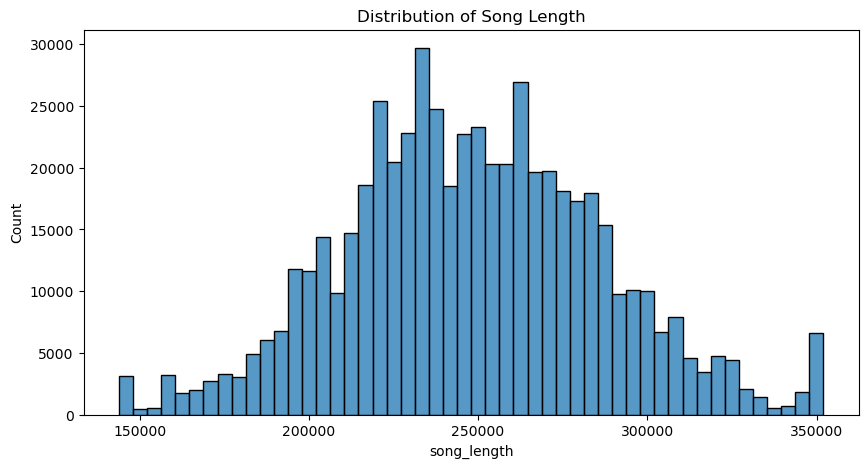

In [84]:
plt.figure(figsize=(10, 5))
sns.histplot(test['song_length'], bins=50)
plt.title('Distribution of Song Length')
plt.show();

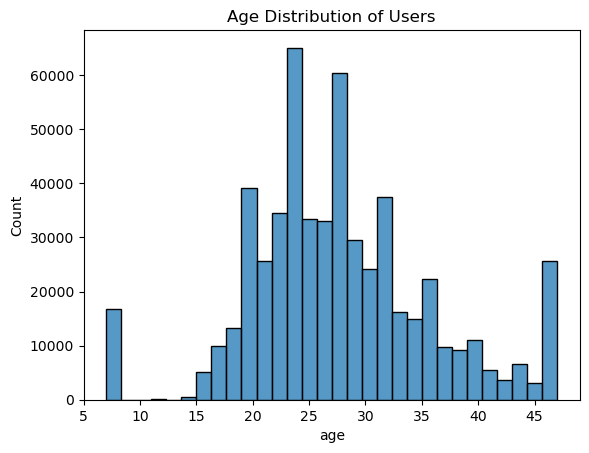

In [85]:
# Age distribution
sns.histplot(test['age'], bins=30)
plt.title('Age Distribution of Users')
plt.show();

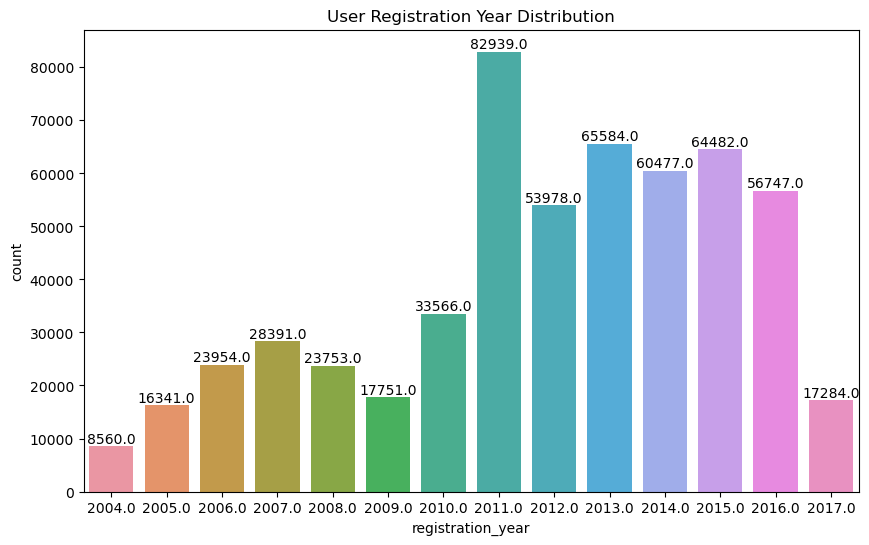

In [99]:
# Plot registration year distribution
test['registration_year'] = test['registration_year'].dt.year

plt.figure(figsize=(10,6))
ax= sns.countplot(x='registration_year', data=test)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.title('User Registration Year Distribution')
plt.show();

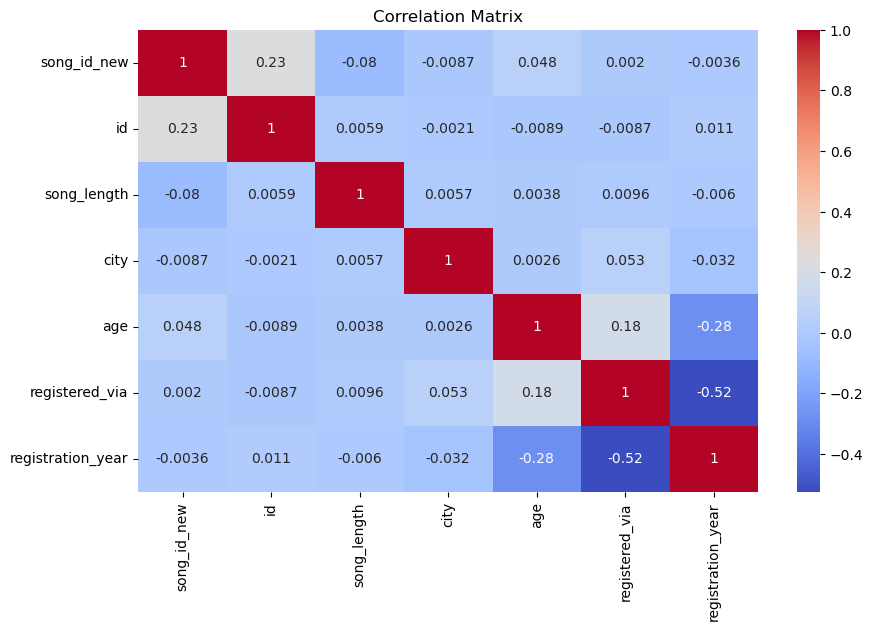

In [100]:
# Correlation matrix for numerical features
numerical_columns = test.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(test[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show();

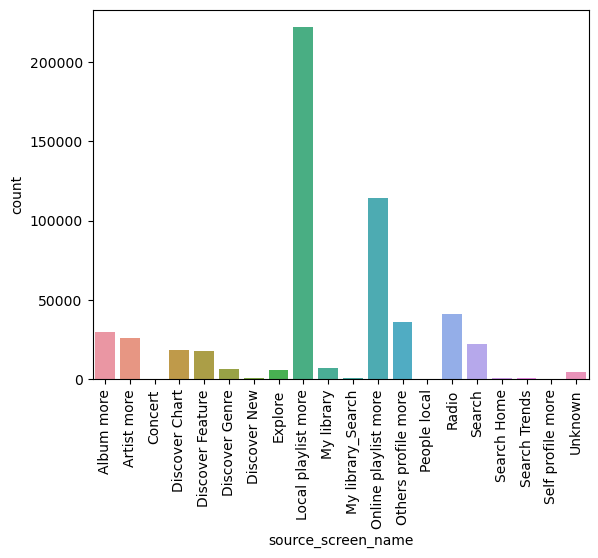

In [101]:
sns.countplot(x='source_screen_name', data=test, orient='v')
plt.xticks(rotation=90)
plt.show();

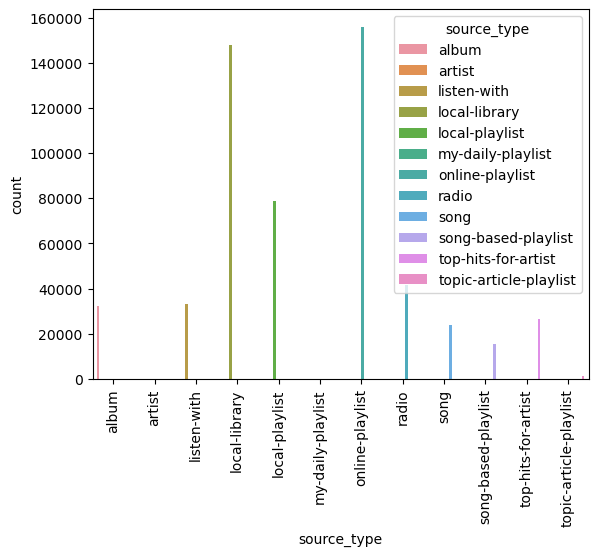

In [102]:
sns.countplot(x='source_type',hue='source_type', data=test, orient= 'v')
plt.xticks(rotation=90)
plt.show();

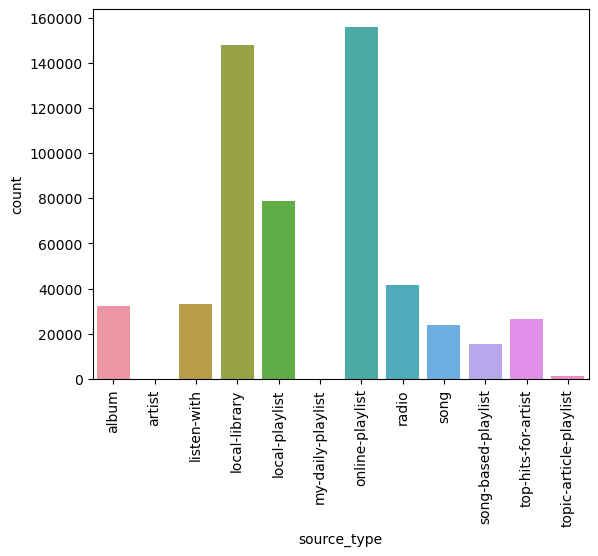

In [103]:
sns.countplot(x = test['source_type'],data =test,orient='v')
plt.xticks(rotation =90)
plt.show();

<Axes: xlabel='language', ylabel='count'>

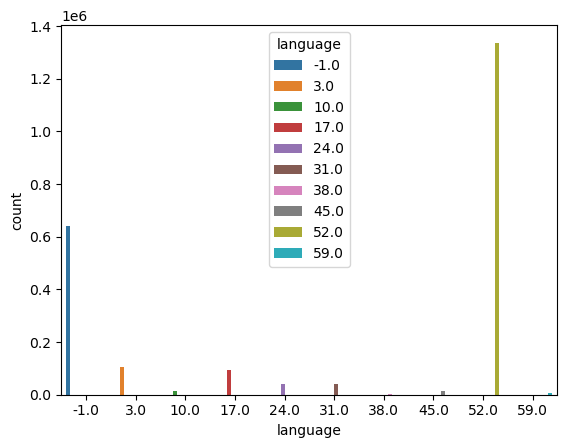

In [104]:
sns.countplot(x = songs['language'],data =test ,hue=songs['language'],orient='v')

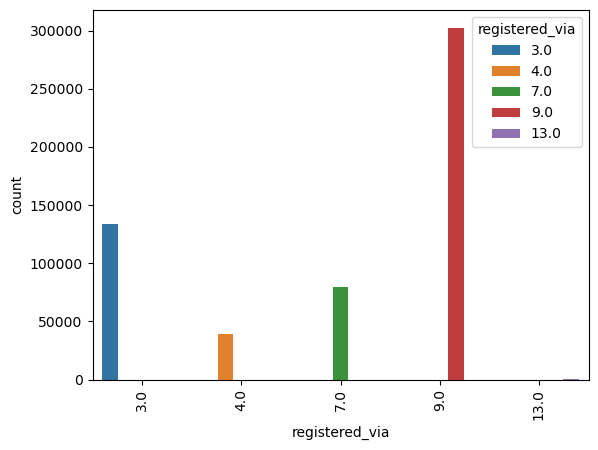

In [105]:
sns.countplot(x = test['registered_via'],hue=test['registered_via'],orient='v')
plt.xticks(rotation =90)
plt.show();

In [106]:
pd.set_option('display.max_columns', None)
test.head(2)

,song_id_new,user_id_new,id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,composer,lyricist,language,city,age,gender,registered_via,expiration_date,song_name,isrc,registration_year
6,1,user_id1,6.0,radio,Radio,radio,200306.0,465,BoA,Joe Belmaati,BoA / Joe Belmaati,3.0,3.0,30.0,male,9.0,NaT,The Shadow,KRA301200363,2007.0
7,2,user_id1,7.0,my library,Local playlist more,local-playlist,344305.0,458,周傳雄 (Steve Chou),周傳雄,陳信榮,3.0,3.0,30.0,male,9.0,NaT,黃昏,TWA470053008,2007.0


test is now ready for model training.

In [107]:
test.to_csv('test_data.csv', index=False)